<a href="https://colab.research.google.com/github/Ruthuvikas/Spotify-clustering/blob/main/popular_spotify_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import numpy
import pandas
import matplotlib
import tqdm

!unzip -n /content/drive/MyDrive/spotify.zip
df = pandas.read_csv('high_popularity_spotify_data.csv')

Archive:  /content/drive/MyDrive/spotify.zip


In [152]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [153]:
# prompt: list all columns

print(df.columns.tolist())


['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id']


Check for NA values

In [154]:
# Check for NA values and identify columns with missing values
na_cols = df.columns[df.isna().any()].tolist()
print(f"Columns with NA values: {na_cols}")

Columns with NA values: ['track_album_name']


In [155]:
# Calculate total number of NA values in the dataset
total_na_values = df.isna().sum().sum()
print(f"Total number of NA values in the dataset: {total_na_values}")

Total number of NA values in the dataset: 1


In [156]:
df = df.drop(['track_id', 'track_album_id', 'playlist_id', 'id', 'analysis_url', 'track_href', 'uri', 'track_album_release_date'], axis=1)

In [157]:
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_name,playlist_name,track_name,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,type
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,Die With A Smile,Today's Top Hits,Die With A Smile,0.000000,0,6,251668,0.3080,mainstream,audio_features
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,HIT ME HARD AND SOFT,Today's Top Hits,BIRDS OF A FEATHER,0.060800,1,2,210373,0.2000,mainstream,audio_features
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,The Secret of Us (Deluxe),Today's Top Hits,That’s So True,0.000000,1,1,166300,0.2140,mainstream,audio_features
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,Short n' Sweet,Today's Top Hits,Taste,0.000000,0,0,157280,0.0939,mainstream,audio_features
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,APT.,Today's Top Hits,APT.,0.000000,0,0,169917,0.0283,mainstream,audio_features
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,People,Afro-Latin Party,People,0.000013,0,10,184791,0.5510,afro-latin,audio_features
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,Boy Alone,Afro-Latin Party,soso,0.129000,0,3,183057,0.4240,afro-latin,audio_features
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,Timeless,Afro-Latin Party,KANTE (feat. Fave),0.000000,0,6,194040,0.1820,afro-latin,audio_features
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,I NEVER LIKED YOU,Afro-Latin Party,WAIT FOR U (feat. Drake & Tems),0.000000,1,1,189893,0.3140,afro-latin,audio_features


In [158]:
import re
def clean_artist_name(name):
    # Remove special characters except for spaces and commas
    cleaned_name = re.sub(r"[^a-zA-Z0-9 ,]", "", name)
    return cleaned_name

# Apply the cleaning function to the 'track_artist' column
df['track_artist'] = df['track_artist'].apply(clean_artist_name)

EDA : Analyse Data

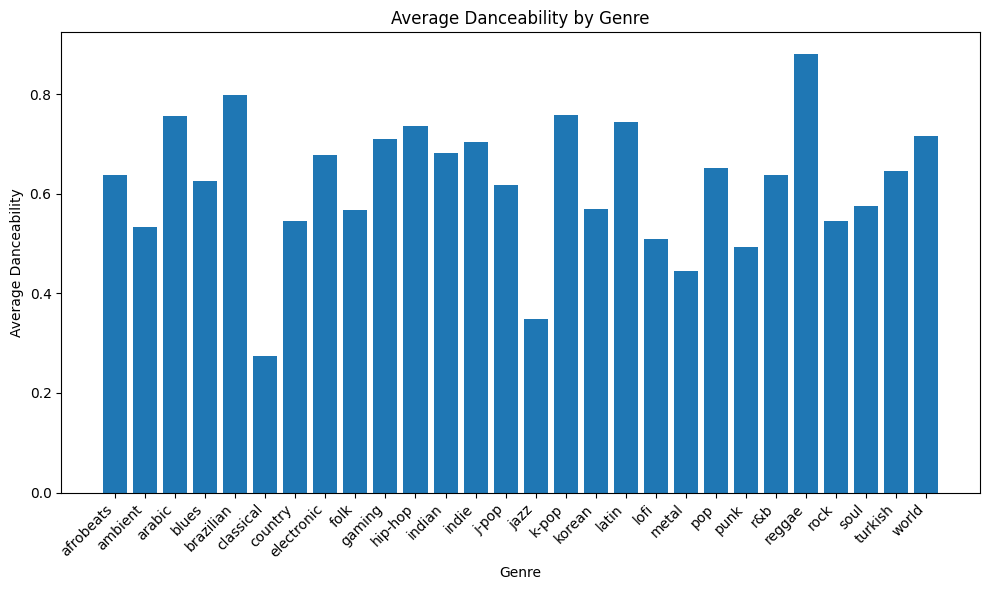

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'track_artist', 'danceability', and 'genre'
genre_danceability = df.groupby('playlist_genre')['danceability'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genre_danceability['playlist_genre'], genre_danceability['danceability'])
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

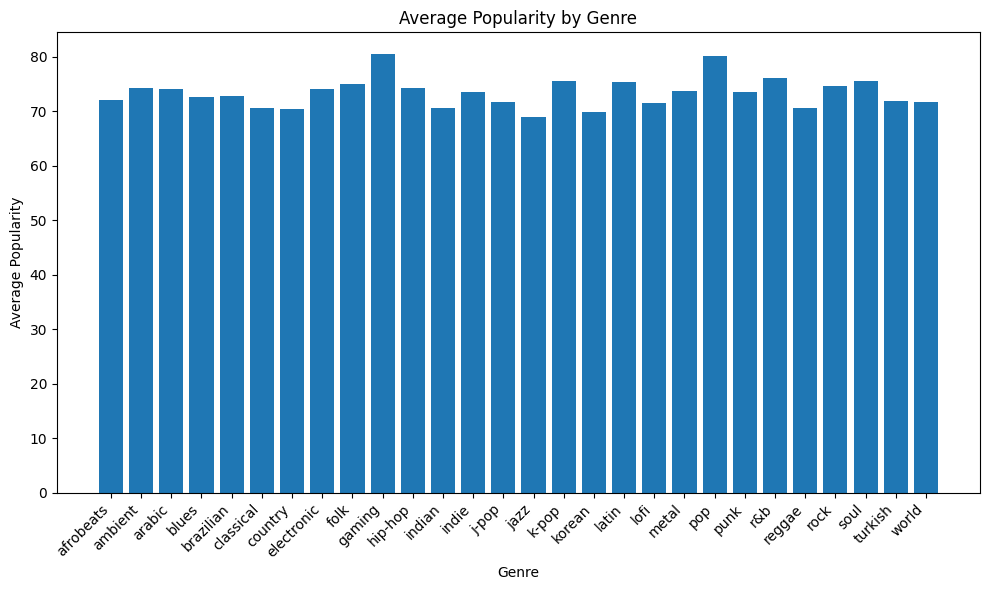

In [160]:
# prompt: plot playlist genre and avg popularity

genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(genre_popularity['playlist_genre'], genre_popularity['track_popularity'])
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Artist

In [161]:
import pandas as pd

# Assuming 'df' is your DataFrame
top_10_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)

top_10_artists

,track_popularity
track_artist,
"Lady Gaga, Bruno Mars",100.0
"ROS, Bruno Mars",98.0
"Oscar Maydon, Fuerza Regida",93.0
Jimin,92.0
"The Weeknd, Playboi Carti",92.0
Chappell Roan,91.6
"Tyler, The Creator, Kali Uchis",90.0
The Neighbourhood,90.0
Djo,89.0


Top 10 Songs

In [162]:
# prompt: top 10 unique tracks

# Assuming 'df' is your DataFrame
top_10_tracks = df.groupby('track_name')['track_popularity'].mean().sort_values(ascending=False).head(10)

top_10_tracks

,track_popularity
track_name,
Die With A Smile,100.0
APT.,98.0
BIRDS OF A FEATHER,97.0
"Good Luck, Babe!",94.0
That’s So True,93.0
Si Antes Te Hubiera Conocido,93.0
WILDFLOWER,93.0
Tu Boda,93.0
Timeless (with Playboi Carti),92.0


In [163]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
artist_list = df['track_artist'].str.split(', ').tolist() # Split into lists of artists
artist_matrix = mlb.fit_transform(artist_list)

artist_df = pandas.DataFrame(artist_matrix, columns=mlb.classes_, index=df.index)
df = pandas.concat([df, artist_df], axis=1)

df = df.drop('track_artist', axis=1)

In [164]:
# prompt: label encode all the columns with strings

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and it's already loaded as shown in the previous code.

for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains strings
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [165]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,mgk,milet,nimino,nouement,sign crushes motorist,sped up nightcore,william,wnboss,xxanteria,yatashigang
0,0.592,157.969,0.521,20,-7.777,0.122,0.535,3,0.0304,100,...,0,0,0,0,0,0,0,0,0,0
1,0.507,104.978,0.747,20,-10.171,0.117,0.438,4,0.0358,97,...,0,0,0,0,0,0,0,0,0,0
2,0.808,108.548,0.554,20,-4.169,0.159,0.372,4,0.0368,93,...,0,0,0,0,0,0,0,0,0,0
3,0.910,112.966,0.670,20,-4.070,0.304,0.786,4,0.0634,81,...,0,0,0,0,0,0,0,0,0,0
4,0.783,149.027,0.777,20,-4.477,0.355,0.939,4,0.2600,98,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df.shape

(1686, 1177)

PCA: reduce dim of high dim features

In [167]:
# prompt: apply standard scalar on the data and find best pca value for the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'df' is your DataFrame and it's already preprocessed as in the previous code.

# Separate features (X) and target variable (y) if you have one.
# If not, use all columns as features:
X = df  # Replace with X = df.drop('target_column', axis=1) if applicable.

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of components for PCA using explained variance ratio
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Optimal number of PCA components for 95% variance: {n_components}")

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the reduced dimensionality data
print(f"Shape of data after PCA: {X_pca.shape}")

Optimal number of PCA components for 95% variance: 783
Shape of data after PCA: (1686, 783)


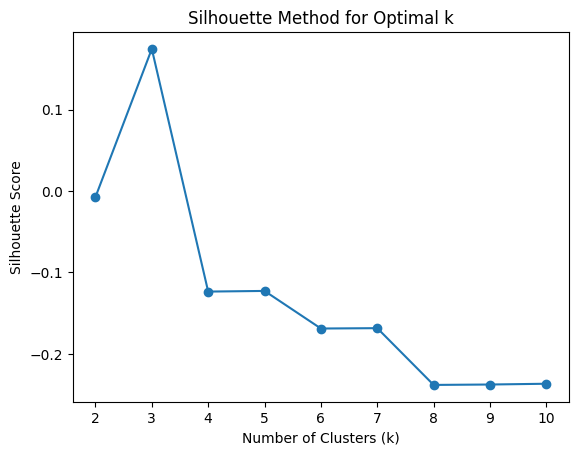

Optimal k (Silhouette Method): 3


In [168]:
# prompt: use elbow method to find optimal k for k-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
k_values = range(2, 11)  # Test k values from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a fixed random_state for reproducibility
    kmeans.fit(X_pca)  # Fit the model to the PCA-transformed data
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Find the optimal k based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k (Silhouette Method): {optimal_k}")

In [196]:
# prompt: perform k means with k = 2

# Assuming 'X_pca' is your PCA-transformed data from the previous code.

kmeans = KMeans(n_clusters=3, random_state=42)  # Set k=2
kmeans.fit(X_pca)
labels = kmeans.labels_

# Now 'labels' contains the cluster assignments for each data point.
labels.shape

(1686,)

In [197]:
# prompt: combine df and pca df also append kmeans data label

# Create a new DataFrame from the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Concatenate the original DataFrame (df) and the PCA DataFrame (pca_df)
combined_df = pd.concat([df, pca_df], axis=1)

# Reset index of combined_df to match the labels array
combined_df = combined_df.reset_index(drop=True)  # Reset index and drop old index

# Add the k-means labels to the combined DataFrame
combined_df['kmeans_label'] = labels

# Now 'combined_df' contains the original data, PCA components, and k-means labels
combined_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,kmeans_label
0,0.592,157.969,0.521,20,-7.777,0.122,0.535,3,0.0304,100,...,-1.329241,1.751522,3.694260,2.967340,0.826866,1.508725,-2.772090,-0.985560,-0.882481,0
1,0.507,104.978,0.747,20,-10.171,0.117,0.438,4,0.0358,97,...,2.116811,-1.452862,0.163919,-3.894926,0.727391,-0.310827,-1.497330,-1.213708,-0.738482,0
2,0.808,108.548,0.554,20,-4.169,0.159,0.372,4,0.0368,93,...,0.216769,-0.186342,-0.160737,0.169827,-0.001523,0.074948,0.350794,-0.086186,-0.278863,0
3,0.910,112.966,0.670,20,-4.070,0.304,0.786,4,0.0634,81,...,-0.256940,-0.034535,-0.080221,0.027849,0.060240,-0.029924,-0.133825,-0.048093,0.000483,0
4,0.783,149.027,0.777,20,-4.477,0.355,0.939,4,0.2600,98,...,1.245085,-2.222198,-4.420216,-3.692693,-1.245751,-1.305063,2.816169,0.929102,1.336324,0


In [198]:
combined_df.shape

(1686, 1961)

In [199]:
!pip install seaborn

In [200]:
import seaborn as sns

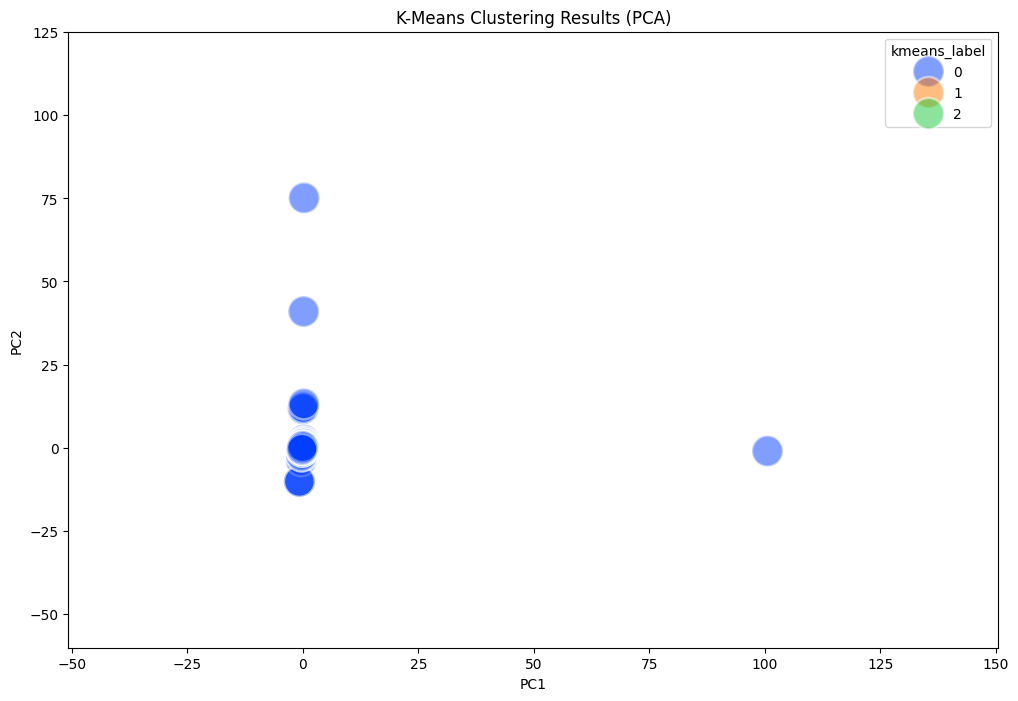

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

x_min = combined_df['PC1'].min()
x_max = combined_df['PC1'].max()
y_min = combined_df['PC2'].min()
y_max = combined_df['PC2'].max()

plt.figure(figsize=(12, 8))  # Adjust width and height as needed
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='kmeans_label', palette='bright', s=500, alpha=0.5)
plt.title('K-Means Clustering Results (PCA)')

plt.xlim([x_min - 50, x_max + 50])
plt.ylim([y_min - 50, y_max + 50])

plt.show()

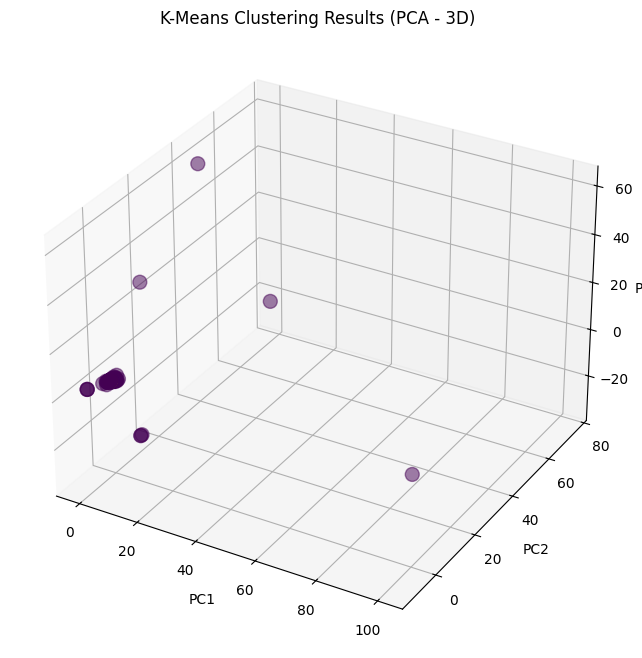

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'combined_df' contains your data

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot
ax.scatter(combined_df['PC1'], combined_df['PC2'], combined_df['PC3'],
           c=combined_df['kmeans_label'], s=100, alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-Means Clustering Results (PCA - 3D)')

plt.show()

In [212]:

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroid_df = pd.DataFrame(data=centroids, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Concatenate original columns with centroids
# Inverse transform the centroids back to the original feature space
centroids_original_space = scaler.inverse_transform(pca.inverse_transform(centroids))

# Create a DataFrame for centroids in the original space
centroid_df_original = pd.DataFrame(centroids_original_space, columns=df.columns)

centroid_df_original

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,...,mgk,milet,nimino,nouement,sign crushes motorist,sped up nightcore,william,wnboss,xxanteria,yatashigang
0,0.667122,121.110114,0.650208,14.646507,-6.707519,0.171610,0.525473,3.950148,0.100984,75.804083,...,0.000592,0.000594,0.000597,0.000594,0.000593,0.000595,0.000593,0.000593,0.000594,0.000594
1,0.745578,102.683279,0.763213,19.158471,-3.714286,0.177314,0.771826,4.019125,0.043118,69.590306,...,0.000984,-0.000209,-0.002595,0.000531,-0.000583,-0.001580,0.003393,0.000281,0.000144,0.000546
2,0.747408,73.485062,0.796587,17.124445,-3.988415,0.113018,0.723543,3.931671,0.061522,85.334255,...,0.001652,-0.000075,-0.002975,-0.000500,0.002683,-0.000142,-0.002027,0.000358,-0.000480,-0.000513
